In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, roc_auc_score,f1_score

In [2]:
data = pd.read_csv('Group_6_data_cleaned.csv')
data.head()

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,0,1,-1,1,-1,-1,1,1,1,0,0
1,1,-1,-1,-1,-1,-1,0,1,1,1,1
2,2,1,-1,0,0,-1,0,-1,1,0,1
3,3,1,0,1,-1,-1,0,1,1,0,0
4,4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
data.columns

Index(['Unnamed: 0', 'SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL',
       'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain',
       'having_IP_Address', 'Result'],
      dtype='object')

In [4]:
# removing redundant column
df = data.drop(['Unnamed: 0'],axis=1)

In [5]:
df.shape

(1353, 10)

In [6]:
df['Result'].unique()

array([ 0,  1, -1])

In [7]:
df.shape

(1353, 10)

In [8]:
#Statistical view of data frame
df.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X = df.drop(['Result'],axis=1)
y = df['Result']

In [10]:
# importing Standard scalar for the data transformation
# Scaling is very important in the case of linear models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(scaled_X)

[[ 0.83184339 -1.09206271  0.81833407 ...  1.38168214  0.8
  -0.35969752]
 [-1.35144295 -1.09206271 -1.61508571 ...  1.38168214  0.8
   2.78011371]
 [ 0.83184339 -1.09206271 -0.39837582 ... -1.24205952  0.8
  -0.35969752]
 ...
 [-1.35144295  0.38107871 -1.61508571 ... -1.24205952 -1.25
  -0.35969752]
 [-0.25979978  0.38107871  0.81833407 ... -1.24205952  0.8
  -0.35969752]
 [ 0.83184339  0.38107871  0.81833407 ... -1.24205952 -1.25
  -0.35969752]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state=100)

# Hyper parameter with randomized search method 

In [12]:
from sklearn.model_selection import  RandomizedSearchCV
parameters = {
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],'penalty': ['l2','l1'],'multi_class':['multinomial']
}
lg = LogisticRegression()
randomized = RandomizedSearchCV(lg,parameters,random_state=0)
randomized.fit(X_train,y_train)

/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'multi_class': ['multinomial'],
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=0)

In [13]:
randomized.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial'}

In [14]:
# logistic model with best hyper parameters
import pickle
log_model = LogisticRegression(penalty='l2',solver='newton-cg',multi_class='multinomial')
log_model.fit(X_train,y_train)
model_name = 'lg_model.sav'
pickle.dump(log_model, open(model_name, 'wb'))

# Evalution Metrics 

In [15]:
# Trainina and testing accuracy, recall,f1 score
y_train_pred = log_model.predict(X_train)
y_test_pred  = log_model.predict(X_test)
print(f" The accuracy for traing data is {accuracy_score(y_train,y_train_pred)}")
print(f" The accuracy for testing data is {accuracy_score(y_test,y_test_pred)}")
print(f" The recall score for traing data is {recall_score(y_train,y_train_pred,average='weighted')} ")
print(f" The recall score for testing data is {recall_score(y_test,y_test_pred,average='weighted')} ")
print(f" The f-1 score for the training data is {f1_score(y_train,y_train_pred,average= 'weighted')}")
print(f" The f-1 score for the testing data is {f1_score(y_test,y_test_pred,average= 'weighted')}")

 The accuracy for traing data is 0.8373812038014784
 The accuracy for testing data is 0.8275862068965517
 The recall score for traing data is 0.8373812038014784 
 The recall score for testing data is 0.8275862068965517 
 The f-1 score for the training data is 0.8147016368390138
 The f-1 score for the testing data is 0.8087961743209328


In [16]:
y_train_roc = log_model.predict_proba(X_train)
y_test_roc = log_model.predict_proba(X_test)
train_roc_score = roc_auc_score(y_train,y_train_roc,average='macro',multi_class='ovo')
test_roc_score = roc_auc_score(y_test,y_test_roc,average='macro',multi_class='ovo')
print(f" The training roc auc score {train_roc_score}")
print(f" The testing roc auc score {test_roc_score}")

 The training roc auc score 0.8969442579162564
 The testing roc auc score 0.8839487913018783


In [17]:
# classification report for training data 
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       510
           0       0.33      0.07      0.11        72
           1       0.82      0.88      0.85       365

    accuracy                           0.84       947
   macro avg       0.67      0.62      0.62       947
weighted avg       0.81      0.84      0.81       947



In [18]:
# classification report for test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          -1       0.81      0.93      0.86       192
           0       0.50      0.13      0.21        31
           1       0.87      0.84      0.85       183

    accuracy                           0.83       406
   macro avg       0.73      0.63      0.64       406
weighted avg       0.81      0.83      0.81       406



In [19]:
# confusion matrix for training data
print(confusion_matrix(y_train,y_train_pred))

[[466   5  39]
 [ 34   5  33]
 [ 38   5 322]]


In [20]:
# confusion matrix for testing data
print(confusion_matrix(y_test,y_test_pred))

[[179   0  13]
 [ 17   4  10]
 [ 26   4 153]]


/Users/kirankumarvelinedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


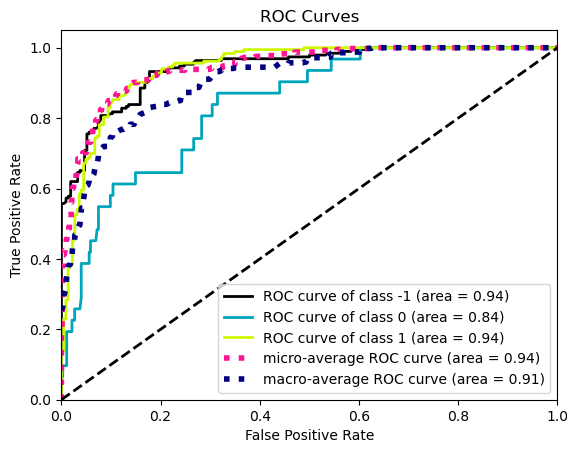

In [21]:
import sklearn.metrics as metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
y_probas = log_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.show()